In [223]:
import pandas as pd
import scipy as sc
import numpy as np

In [224]:
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# notice we are adding two new imports for visualizations; This was not here last class
from itertools import product
from pandas_profiling import ProfileReport

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [225]:
newland_train = pd.read_excel('Train.xlsx')
newland_test = pd.read_excel('Test.xlsx')

In [226]:
newland_train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [227]:
newland_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [228]:
newland_test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0


In [229]:
newland_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              10100 non-null  int64 
 1   Name                    10100 non-null  object
 2   Birthday                10100 non-null  object
 3   Native Continent        10100 non-null  object
 4   Marital Status          10100 non-null  object
 5   Lives with              10100 non-null  object
 6   Base Area               10100 non-null  object
 7   Education Level         10100 non-null  object
 8   Years of Education      10100 non-null  int64 
 9   Employment Sector       10100 non-null  object
 10  Role                    10100 non-null  object
 11  Working Hours per week  10100 non-null  int64 
 12  Money Received          10100 non-null  int64 
 13  Ticket Price            10100 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [230]:
newland_train.describe(include = 'all')

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400,22400,22400,22400,22400,22400,22400,22400.000000,22400,22400,22400.000000,22400.000000,22400.000000,22400.000000
unique,NaN,16074,11257,5,7,6,40,16,NaN,9,15,NaN,NaN,NaN,NaN
top,NaN,Mr. Eric Paige,"August 15,2025",Europe,Married,Wife,Northbury,Professional School,NaN,Private Sector - Services,Professor,NaN,NaN,NaN,NaN
freq,NaN,4,9,19111,10219,9012,20074,7232,NaN,15599,2849,NaN,NaN,NaN,NaN
mean,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.173884,NaN,NaN,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512451,NaN,NaN,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,45.000000,0.000000,0.000000,0.000000


In [231]:
from datetime import datetime
import calendar

In [232]:
#Created the variable age
### Train ###
newland_train["Birth_year"] = newland_train["Birthday"].str.split(',', expand=True)[1]
newland_train["Birth_year"] = newland_train["Birth_year"].astype(int)
newland_train["Age"] = 2046 - newland_train["Birth_year"]

### Test ###
newland_test["Birth_year"] = newland_test["Birthday"].str.split(',', expand=True)[1]
newland_test["Birth_year"] = newland_test["Birth_year"].astype(int)
newland_test["Age"] = 2046 - newland_test["Birth_year"]

In [233]:
# Create Group types
### Train ###
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'A'
newland_train.loc[(newland_train['Money Received'] > 0) & (newland_train['Ticket Price'] == 0), 'Group'] = 'B'
newland_train.loc[(newland_train['Money Received'] == 0) & (newland_train['Ticket Price'] > 0), 'Group'] = 'C'

### Test ###
newland_test.loc[(newland_test['Money Received'] == 0) & (newland_test['Ticket Price'] == 0), 'Group'] = 'A'
newland_test.loc[(newland_test['Money Received'] > 0) & (newland_test['Ticket Price'] == 0), 'Group'] = 'B'
newland_test.loc[(newland_test['Money Received'] == 0) & (newland_test['Ticket Price'] > 0), 'Group'] = 'C'

In [234]:
newland_train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Birth_year,Age,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,2003,43,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,2006,40,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,2009,37,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,1985,61,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,2015,31,A


In [235]:
#Removed 4 columns
newland_train.drop(columns=['Birthday', 'Name', 'Birth_year', 'Money Received','Ticket Price'], inplace=True)
newland_test.drop(columns=['Birthday', 'Name', 'Birth_year', 'Money Received','Ticket Price'], inplace=True)

In [236]:
#Convert Education level - categorical varible into continuous | Encoding Education Level

EduLvlDict = {"Preschool":0,"Primary School":1,"Middle School - 1st Cycle":2,"Middle School - 2nd Cycle":3,"Middle School Complete":4,
              "High School - 1st Cycle":5,"High School - 2nd Cycle":6,"High School Complete":7,"High School + PostGraduation":8,"Professional School":9,
              "Professional School + PostGraduation":10,"Bachelors":11,"Bachelors + PostGraduation":12,"Masters":13,"Masters + PostGraduation":14,"PhD":15}

 

newland_train.replace({"Education Level": EduLvlDict}, inplace = True)
newland_test.replace({"Education Level": EduLvlDict}, inplace = True)

In [237]:
#newland_train.reset_index(level=0, inplace=True)#.set_index('CITIZEN_ID', inplace=True)
newland_train.head()

,CITIZEN_ID,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Income,Age,Group
0,12486,Europe,Married,Wife,Northbury,8,13,Private Sector - Services,Repair & constructions,40,1,43,C
1,12487,Europe,Married,Wife,Northbury,9,12,Public Sector - Others,Repair & constructions,40,1,40,A
2,12488,Europe,Married,Wife,Northbury,9,12,Private Sector - Services,Sales,46,1,37,C
3,12489,Europe,Married,Wife,Northbury,6,11,Private Sector - Services,Security,37,1,61,B
4,12490,Europe,Single,Other Family,Northbury,15,21,Self-Employed (Individual),Professor,45,1,31,A


In [238]:
#reorder columns so that categoricals are in the beginning and continuous one at the end
### Train ###
newland_train = newland_train[['CITIZEN_ID', 'Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role',
                               'Group', 'Income', 'Education Level', 'Years of Education', 'Working Hours per week', 'Age']]

### Test ###
newland_test = newland_test[['CITIZEN_ID', 'Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role',
                               'Group', 'Education Level', 'Years of Education', 'Working Hours per week', 'Age']]


In [239]:
# transforming variables into categoricals
### Train ###
newland_train['CITIZEN_ID'] = newland_train['CITIZEN_ID'].astype('category')
newland_train['Native Continent'] = newland_train['Native Continent'].astype('category')
newland_train['Marital Status'] = newland_train['Marital Status'].astype('category')
newland_train['Base Area'] = newland_train['Base Area'].astype('category')
newland_train['Employment Sector'] = newland_train['Employment Sector'].astype('category')
newland_train['Role'] = newland_train['Role'].astype('category')
newland_train['Group'] = newland_train['Group'].astype('category')
newland_train['Income'] = newland_train['Income'].astype('category')

### Test ###
newland_test['CITIZEN_ID'] = newland_test['CITIZEN_ID'].astype('category')
newland_test['Native Continent'] = newland_test['Native Continent'].astype('category')
newland_test['Marital Status'] = newland_test['Marital Status'].astype('category')
newland_test['Base Area'] = newland_test['Base Area'].astype('category')
newland_test['Employment Sector'] = newland_test['Employment Sector'].astype('category')
newland_test['Role'] = newland_test['Role'].astype('category')
newland_test['Group'] = newland_test['Group'].astype('category')

## Data Visualisation

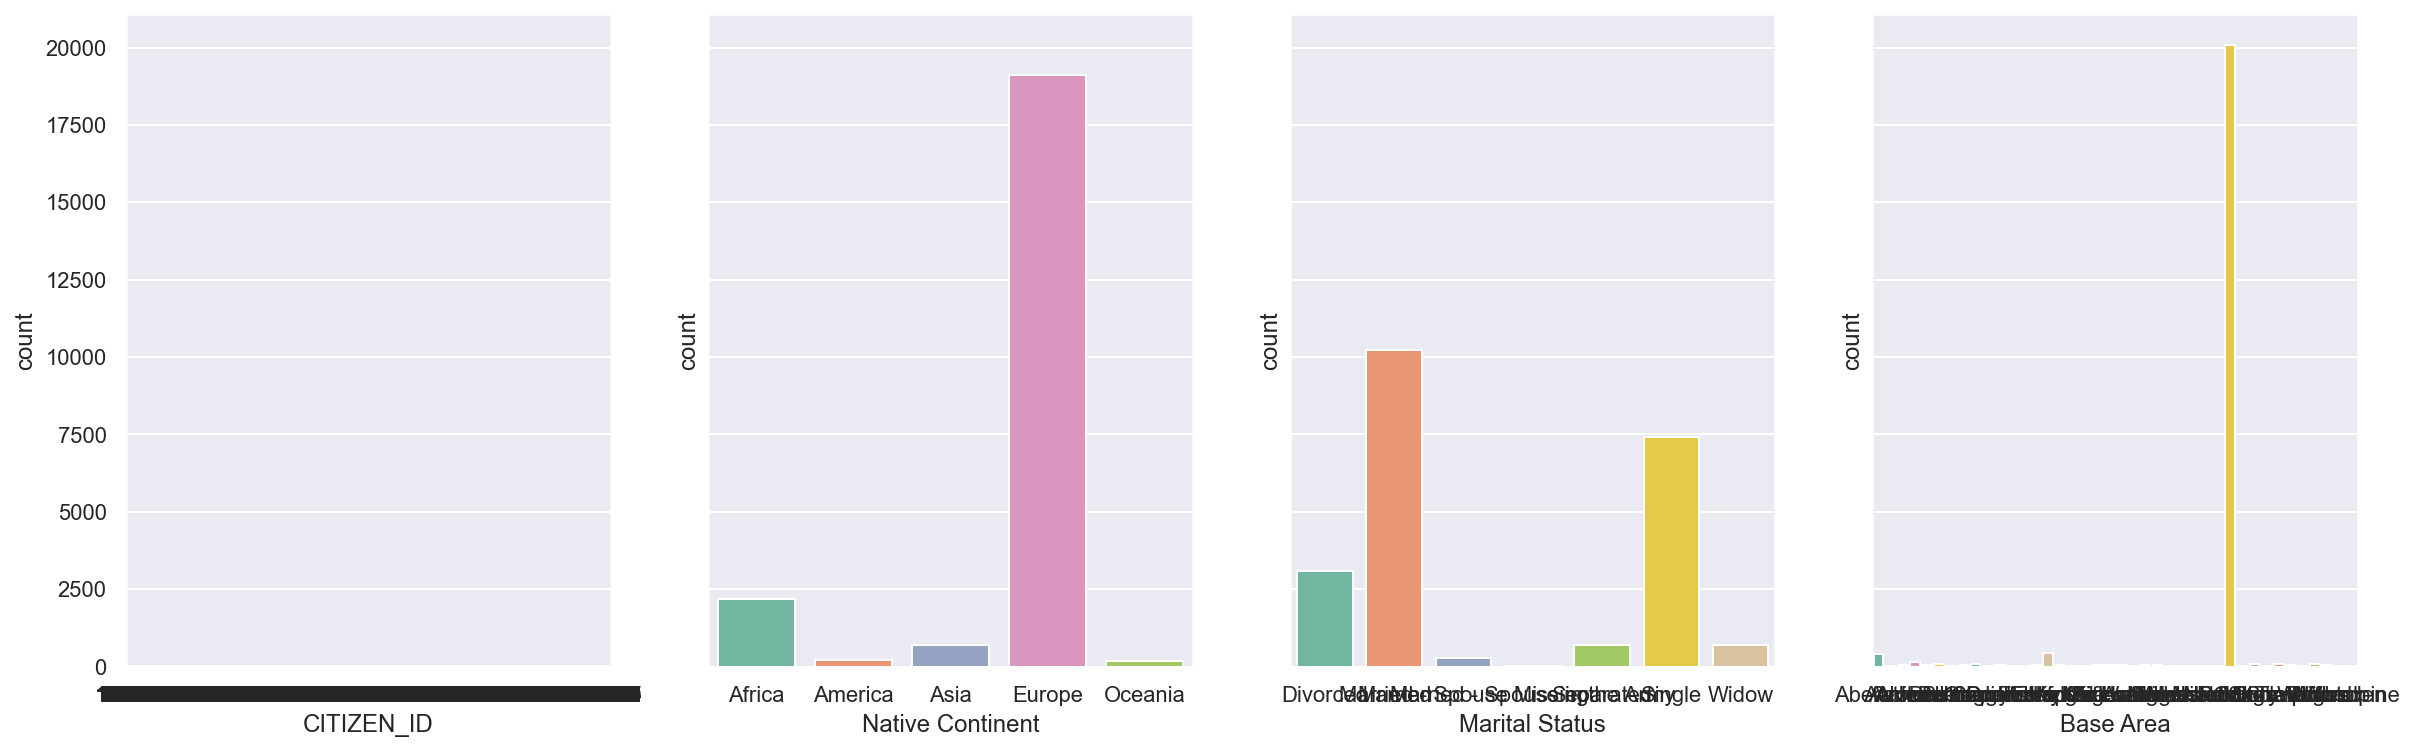

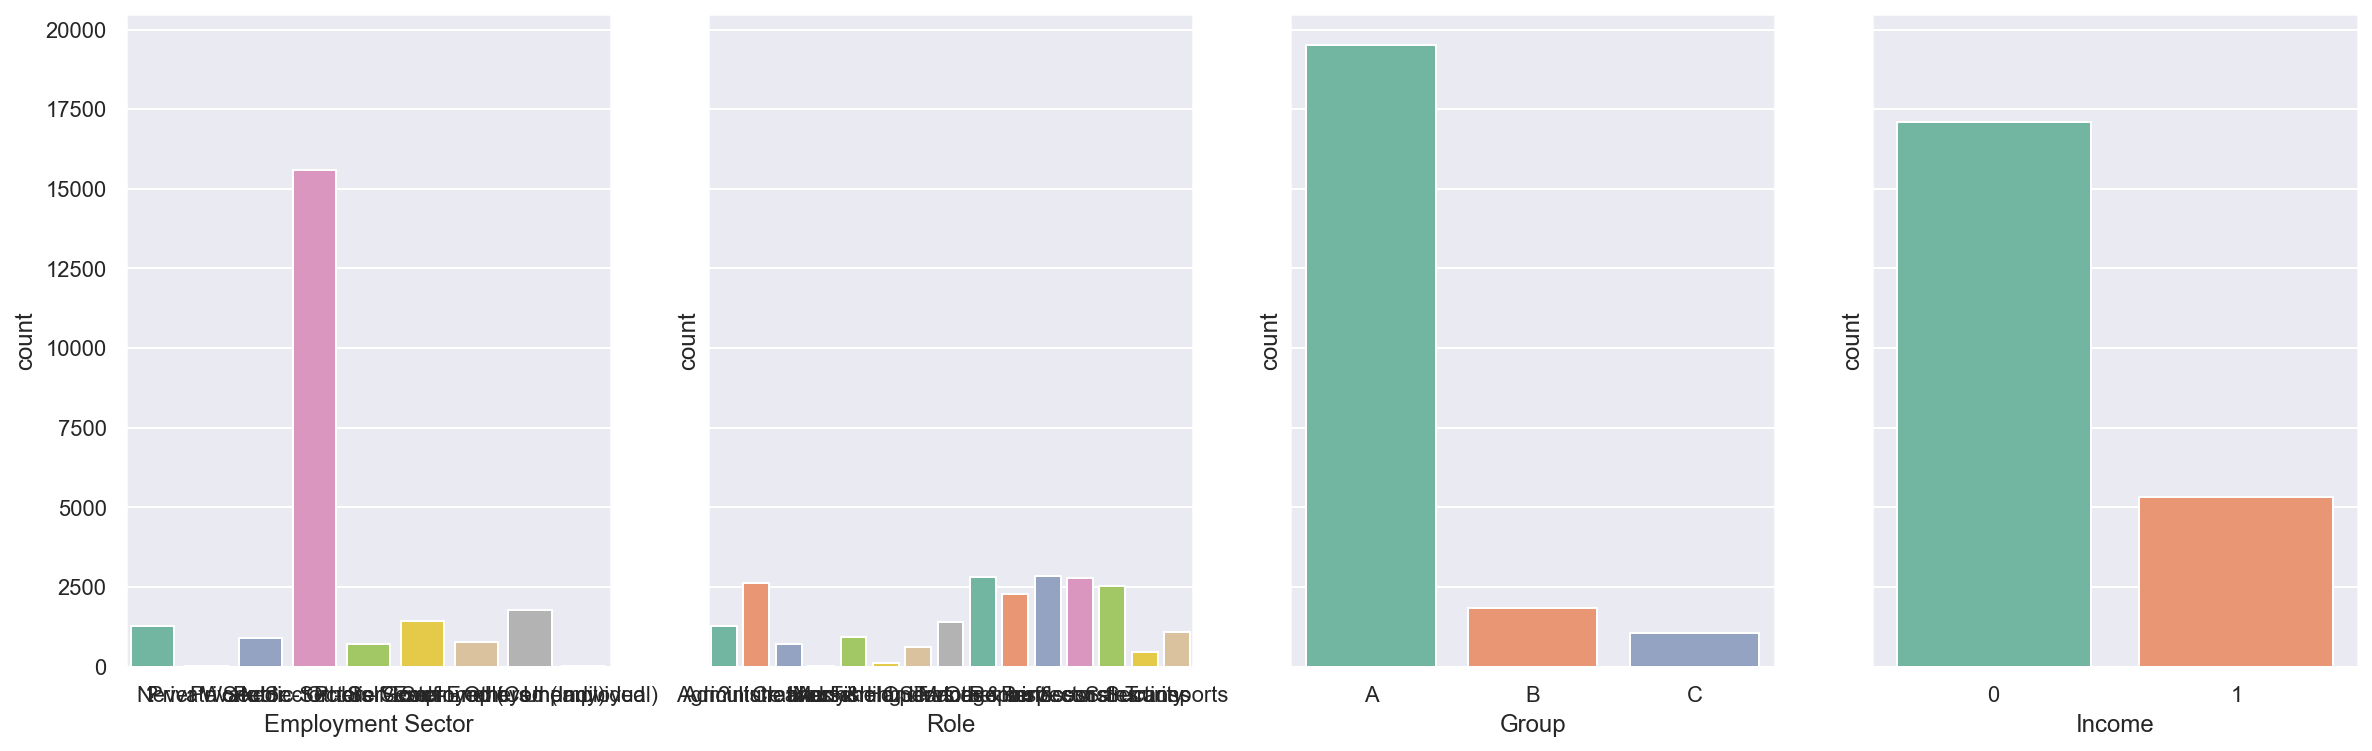

In [18]:
# We will visualize all the categorical attributes using bar charts
#names of all the columns
cols = newland_train.columns

#Plot count plot for all attributes in a 2x4 grid
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(20, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=newland_train, ax=ax[j], palette="Set2")

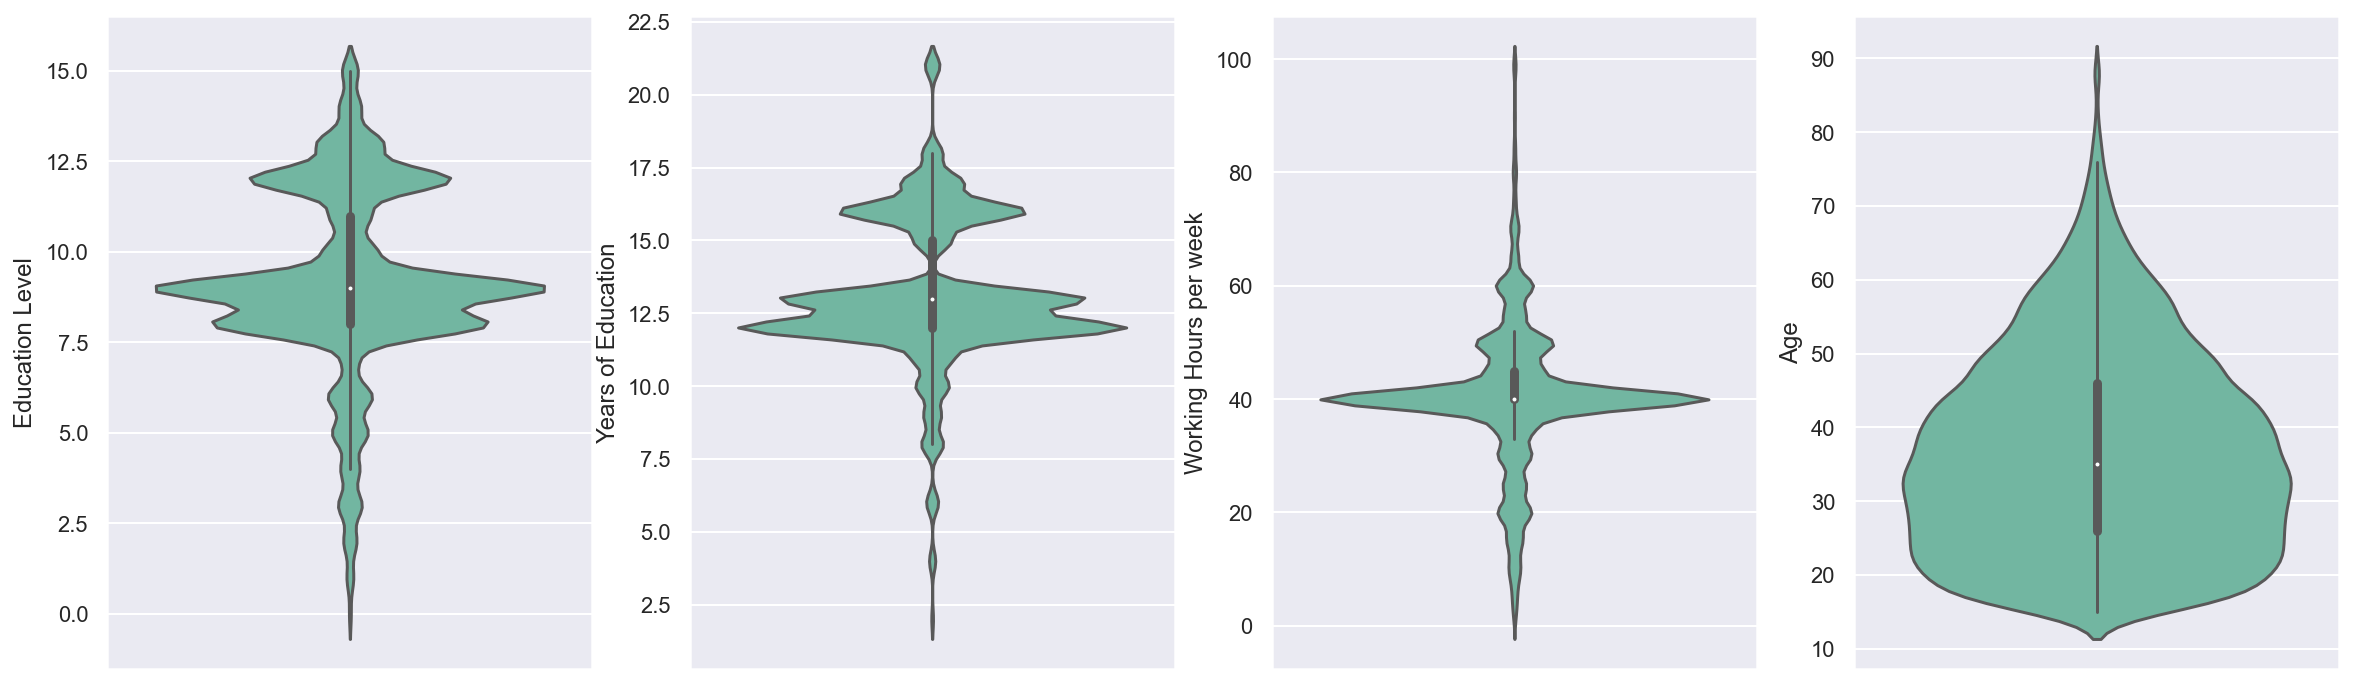

In [19]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

#create a dataframe with only continuous features
data=newland_train.loc[:,['Education Level','Years of Education','Working Hours per week','Age']] 

#get the names of all the columns
cols=data.columns

#Plot violin for all attributes in a 2x2 grid
n_cols = 2
n_rows = 2

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(20, 6))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=newland_train, ax=ax[j], palette="Set2")

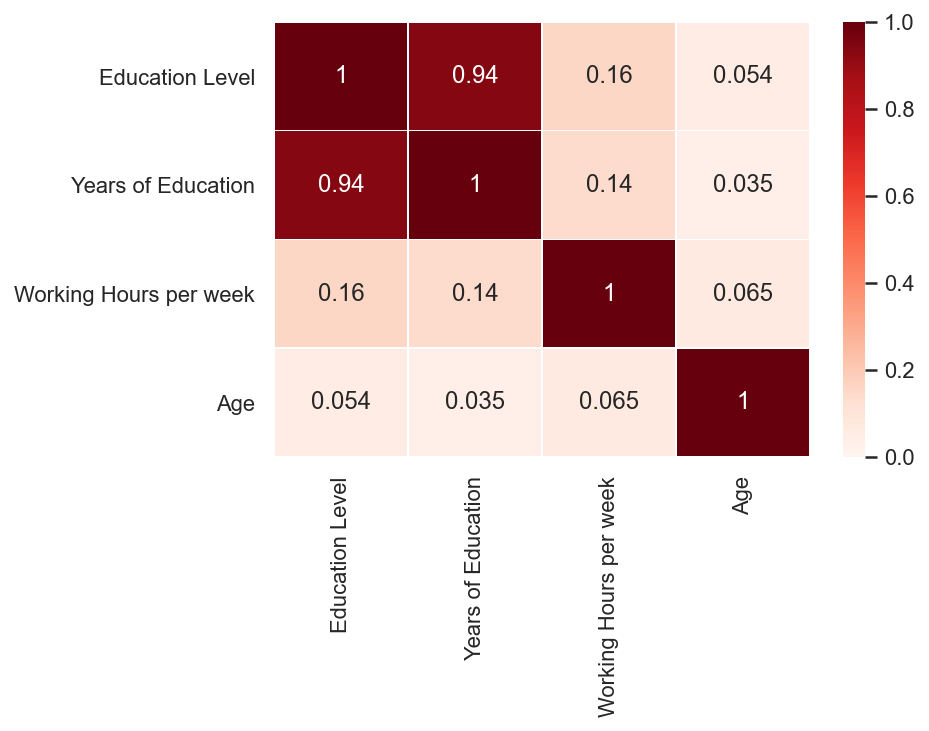

In [118]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, we will ignore categorical data
# Calculates pearson co-efficient for all combinations and visualises in a heatmap
corr = newland_train.corr()

hp_corr = sns.heatmap(corr, cmap=plt.cm.Reds, annot=True,
                      xticklabels=True, yticklabels=True,
                      linewidths=.2, vmin=0, vmax=1) 
hp_corr.set_xticklabels(hp_corr.get_xticklabels(), rotation=90) 
hp_corr.set_yticklabels(hp_corr.get_yticklabels()) 

plt.show()

In [220]:
### Ordinal Enconder - Use when the relationship is known

#from sklearn.preprocessing import OrdinalEncoder

#enc = OrdinalEncoder()

### Train ###
#enc.fit_transform(newland_train[['Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role','Group', 'Income']])
#newland_train[['Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role','Group','Income']] = enc.transform(newland_train[['Native Continent','Marital Status', 'Base Area','Employment Sector','Role','Group', 'Income']])

### Test ###
#enc.fit_transform(newland_test[['Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role','Group']])
#newland_test[['Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role','Group']] = enc.transform(newland_test[['Native Continent','Marital Status', 'Base Area','Employment Sector','Role','Group']])

In [ ]:
## Data Transformation

In [255]:
#Encoding

#get dummy variables and append them to the dataset
dummies_NC = pd.get_dummies(newland_train['Native Continent'],prefix='NC')
newland_train_encoded = pd.concat([dummies_NC,newland_train], axis=1)

dummies_MS = pd.get_dummies(newland_train['Marital Status'],prefix='MS')
newland_train_encoded = pd.concat([dummies_MS,newland_train_encoded], axis=1)

dummies_BA = pd.get_dummies(newland_train['Base Area'],prefix='BA')
newland_train_encoded = pd.concat([dummies_BA,newland_train_encoded], axis=1)

dummies_ES = pd.get_dummies(newland_train['Employment Sector'],prefix='ES')
newland_train_encoded = pd.concat([dummies_ES,newland_train_encoded], axis=1)

dummies_Role = pd.get_dummies(newland_train['Role'],prefix='Role')
newland_train_encoded = pd.concat([dummies_Role,newland_train_encoded], axis=1)

dummies_Group = pd.get_dummies(newland_train['Group'],prefix='Group')
newland_train_encoded = pd.concat([dummies_Group,newland_train_encoded], axis=1)

dummies_Income = pd.get_dummies(newland_train['Income'],prefix='Income')
newland_train_encoded = pd.concat([dummies_Income,newland_train_encoded], axis=1)

In [256]:
# drop non-dummy categoricals
newland_train_encoded.drop(['Native Continent', 'Marital Status', 'Base Area','Employment Sector','Role','Group', 'Income'], axis=1, inplace=True)

In [257]:
newland_train_encoded.columns.values

array(['Income_0', 'Income_1', 'Group_A', 'Group_B', 'Group_C', 'Role_?',
       'Role_Administratives', 'Role_Agriculture and Fishing',
       'Role_Army', 'Role_Cleaners & Handlers', 'Role_Household Services',
       'Role_IT', 'Role_Machine Operators & Inspectors',
       'Role_Management', 'Role_Other services', 'Role_Professor',
       'Role_Repair & constructions', 'Role_Sales', 'Role_Security',
       'Role_Transports', 'ES_?', 'ES_Never Worked',
       'ES_Private Sector - Others', 'ES_Private Sector - Services ',
       'ES_Public Sector - Government', 'ES_Public Sector - Others',
       'ES_Self-Employed (Company)', 'ES_Self-Employed (Individual)',
       'ES_Unemployed', 'BA_?', 'BA_Aberuthven', 'BA_Aerilon',
       'BA_Alverton', 'BA_Aroonshire', 'BA_Auchenshuggle', 'BA_Bellenau',
       'BA_Bellmoral', 'BA_Butterpond', 'BA_Carlisle', 'BA_Cherrytown',
       'BA_Conriston', 'BA_Drumchapel', 'BA_Eelry', 'BA_Fanfoss',
       "BA_Fool's March", 'BA_Ironforge', 'BA_Kald', "BA_K

In [189]:
# Normalizing continuous variables
from sklearn import preprocessing

newland_train_norm = newland_train.copy()
newland_test_norm = newland_test.copy()

# First create a minimum and maximum processor object from the train dataset
normalizer_EduLvl = preprocessing.MinMaxScaler().fit(newland_train_norm[['Education Level']])
normalizer_YoE = preprocessing.MinMaxScaler().fit(newland_train_norm[['Years of Education']])
normalizer_WHpW = preprocessing.MinMaxScaler().fit(newland_train_norm[['Working Hours per week']])
normalizer_Age = preprocessing.MinMaxScaler().fit(newland_train_norm[['Age']])

In [190]:
#Transform the train dataset
newland_train_norm[['Education Level']] = normalizer_EduLvl.transform(newland_train_norm[['Education Level']])
newland_train_norm[['Years of Education']] = normalizer_YoE.transform(newland_train_norm[['Years of Education']])
newland_train_norm[['Working Hours per week']] = normalizer_WHpW.transform(newland_train_norm[['Working Hours per week']])
newland_train_norm[['Age']] = normalizer_Age.transform(newland_train_norm[['Age']])

In [191]:
#Transform the test dataset
newland_test_norm[['Education Level']] = normalizer_EduLvl.transform(newland_test_norm[['Education Level']])
newland_test_norm[['Years of Education']] = normalizer_YoE.transform(newland_test_norm[['Years of Education']])
newland_test_norm[['Working Hours per week']] = normalizer_WHpW.transform(newland_test_norm[['Working Hours per week']])
newland_test_norm[['Age']] = normalizer_Age.transform(newland_test_norm[['Age']])

In [192]:
newland_train_norm.head()

,CITIZEN_ID,Native Continent,Marital Status,Base Area,Employment Sector,Role,Group,Income,Education Level,Years of Education,Working Hours per week,Age
0,12486,3.0,1.0,29.0,3.0,11.0,2.0,1.0,0.533333,0.578947,0.397959,0.383562
1,12487,3.0,1.0,29.0,5.0,11.0,0.0,1.0,0.600000,0.526316,0.397959,0.342466
2,12488,3.0,1.0,29.0,3.0,12.0,2.0,1.0,0.600000,0.526316,0.459184,0.301370
3,12489,3.0,1.0,29.0,3.0,13.0,1.0,1.0,0.400000,0.473684,0.367347,0.630137
4,12490,3.0,5.0,29.0,7.0,10.0,0.0,1.0,1.000000,1.000000,0.448980,0.219178


In [194]:
newland_test_norm.head()

,CITIZEN_ID,Native Continent,Marital Status,Base Area,Employment Sector,Role,Group,Education Level,Years of Education,Working Hours per week,Age
0,34886,3.0,1.0,27.0,2.0,12.0,0.0,0.800000,0.736842,0.397959,0.260274
1,34887,3.0,5.0,27.0,2.0,10.0,0.0,0.800000,0.736842,0.357143,0.232877
2,34888,3.0,0.0,27.0,2.0,8.0,1.0,0.666667,0.578947,0.500000,0.150685
3,34889,3.0,1.0,27.0,2.0,10.0,2.0,0.600000,0.526316,0.479592,0.205479
4,34890,3.0,1.0,34.0,4.0,10.0,0.0,0.733333,0.684211,0.448980,0.273973


### Adjust charts for categorical****

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

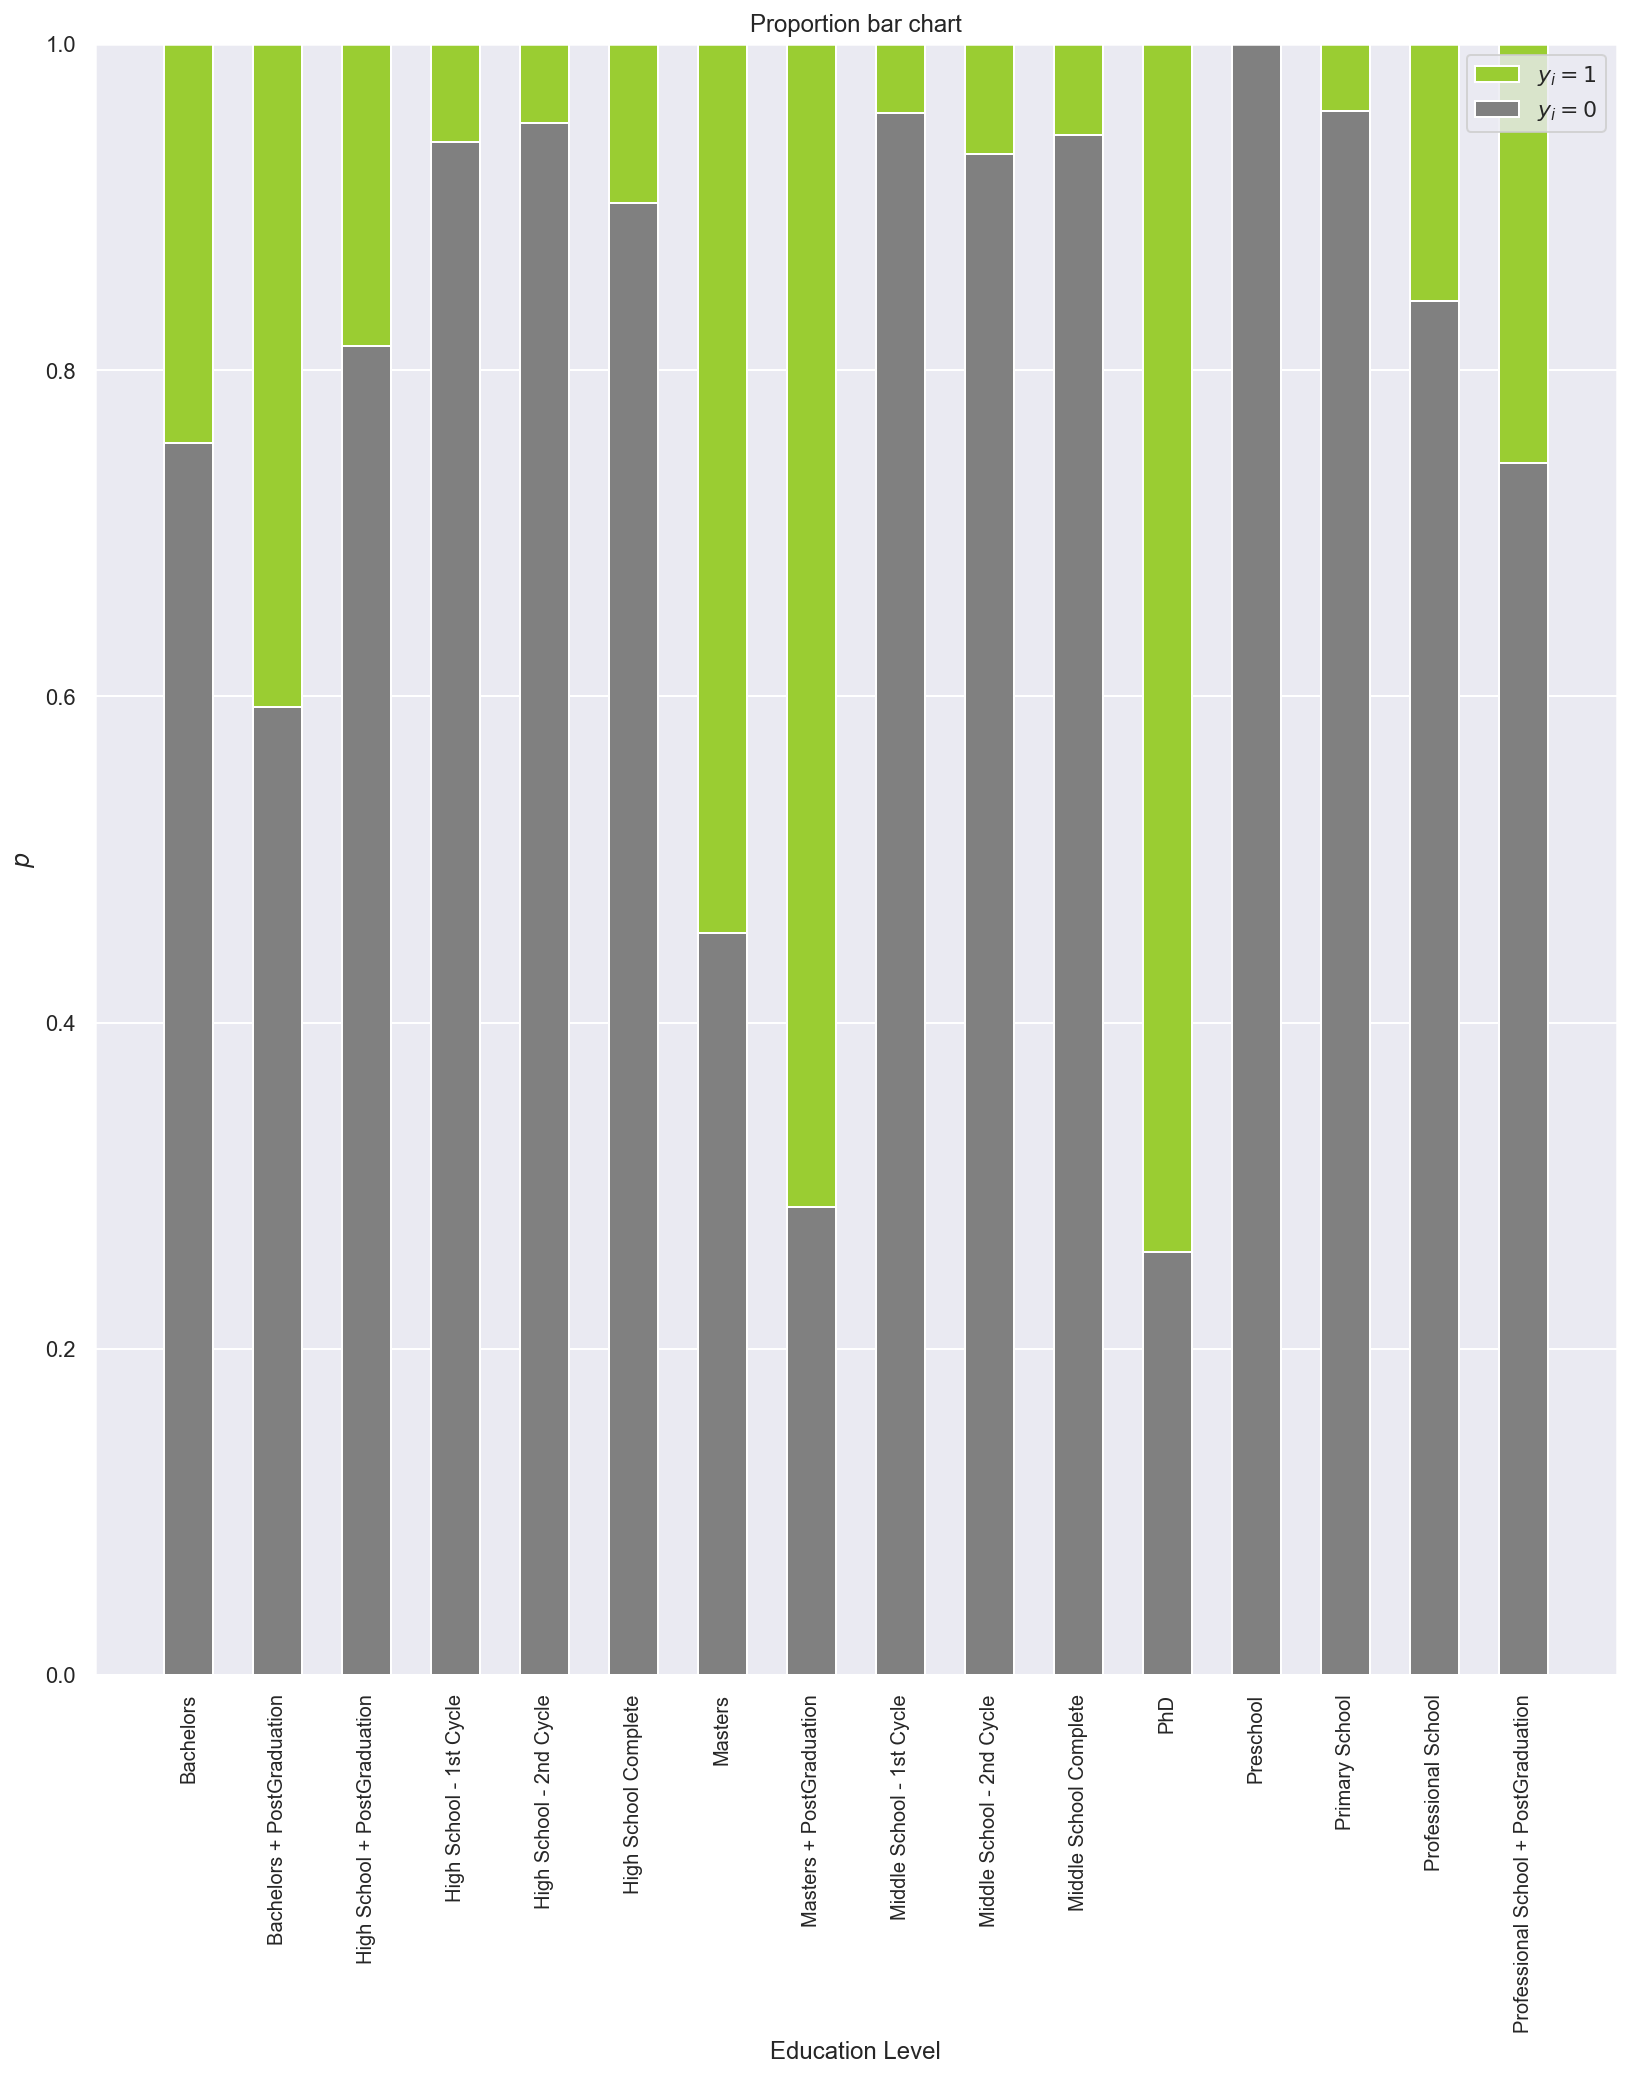

In [140]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)

    plt.show()
    
bar_charts_categorical(newland_train, "Education Level", "Income")

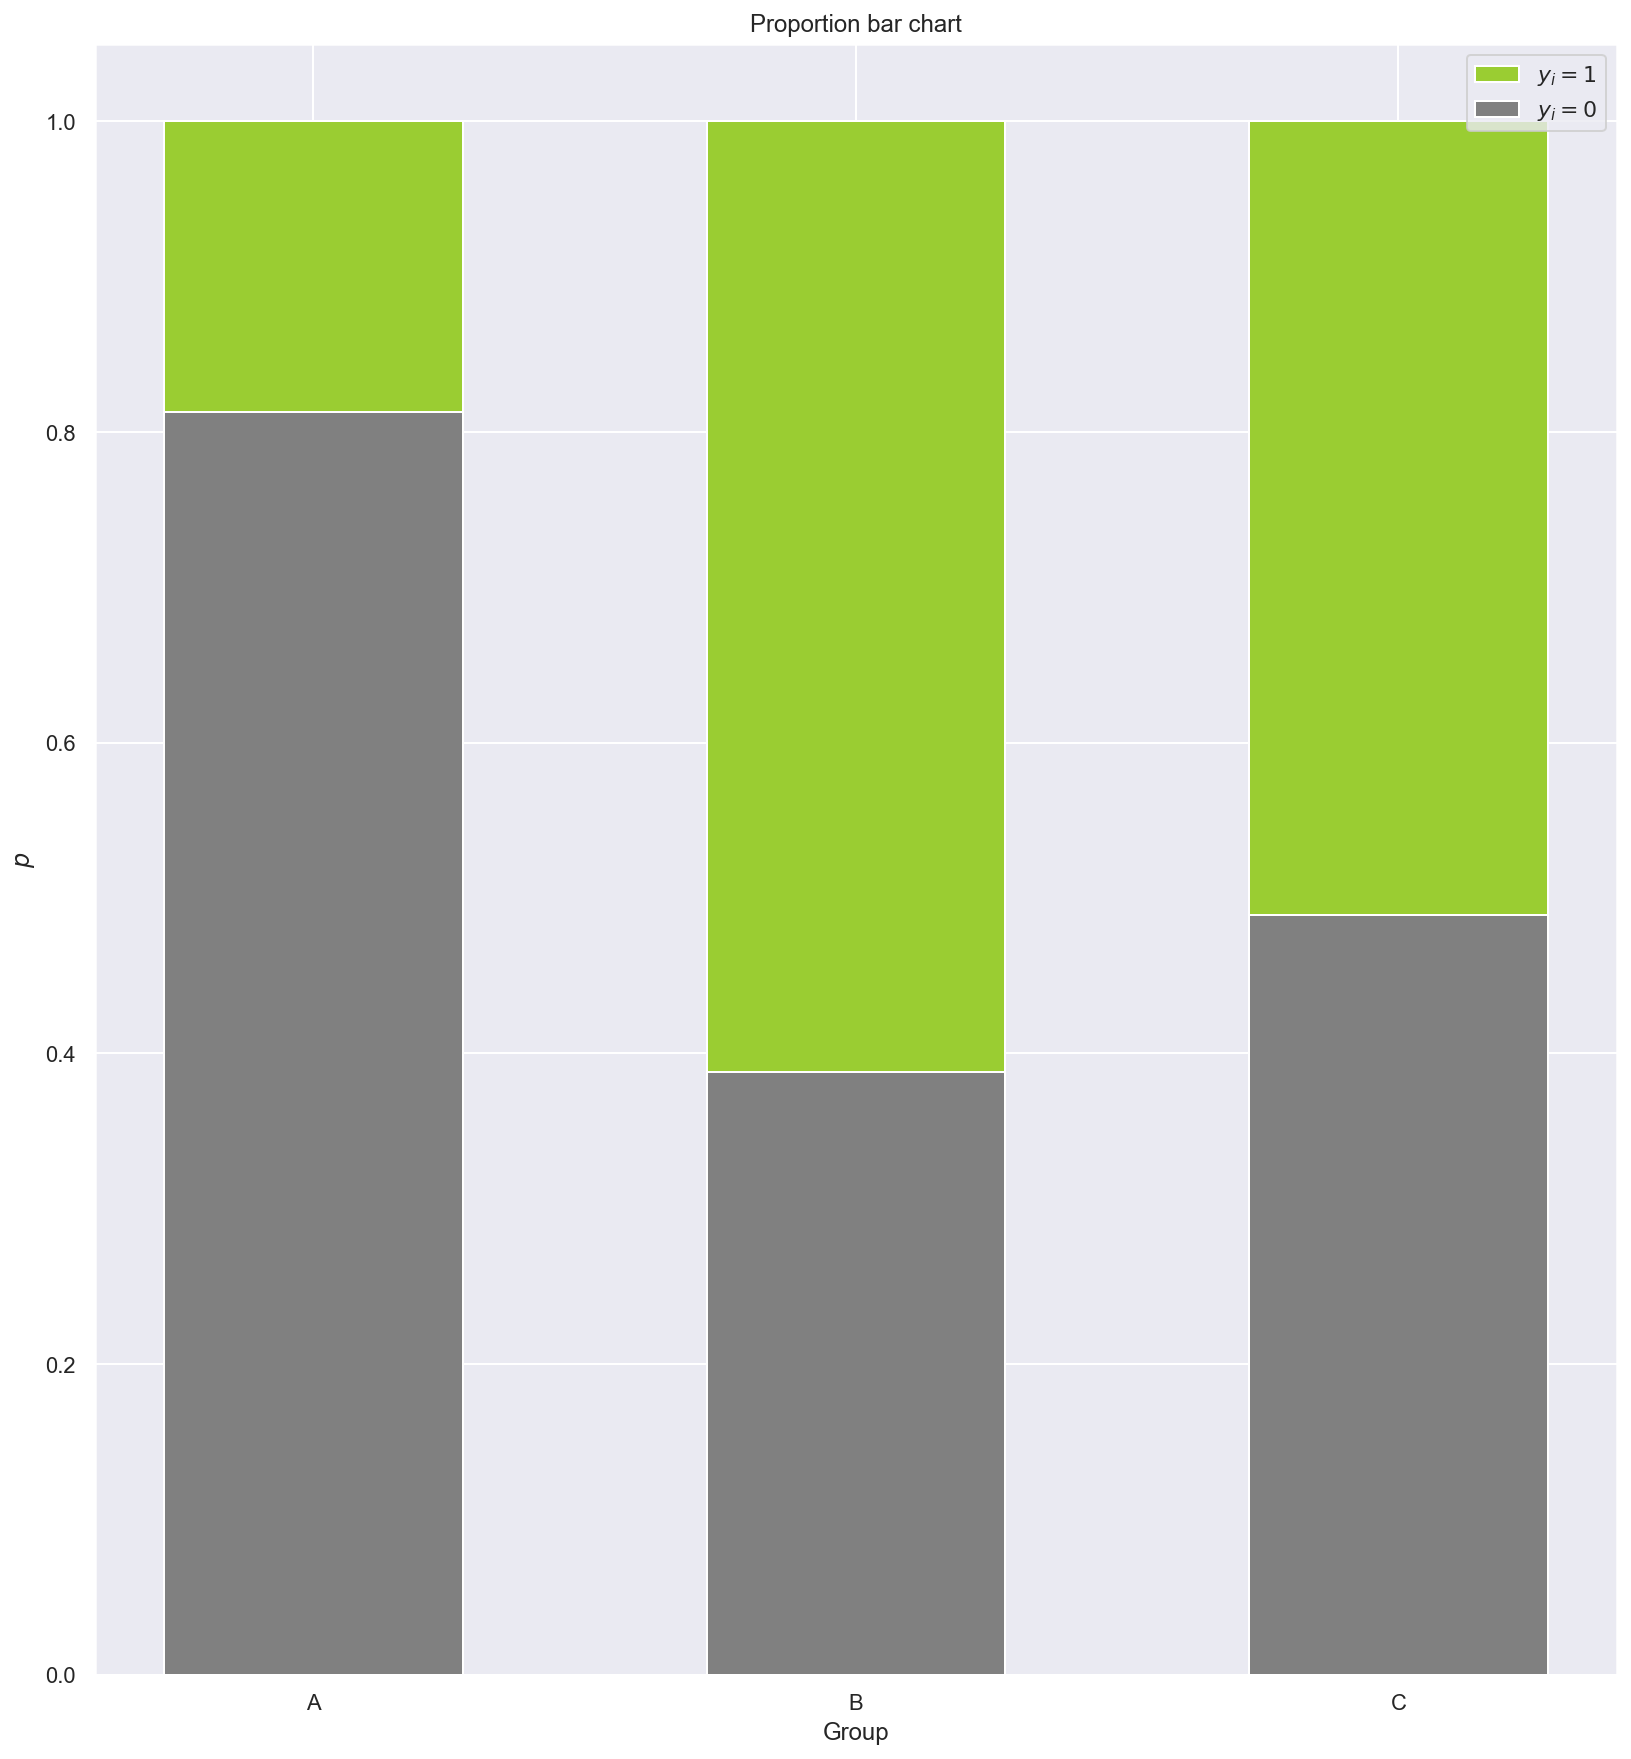

In [141]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(newland_train, "Group", "Income")

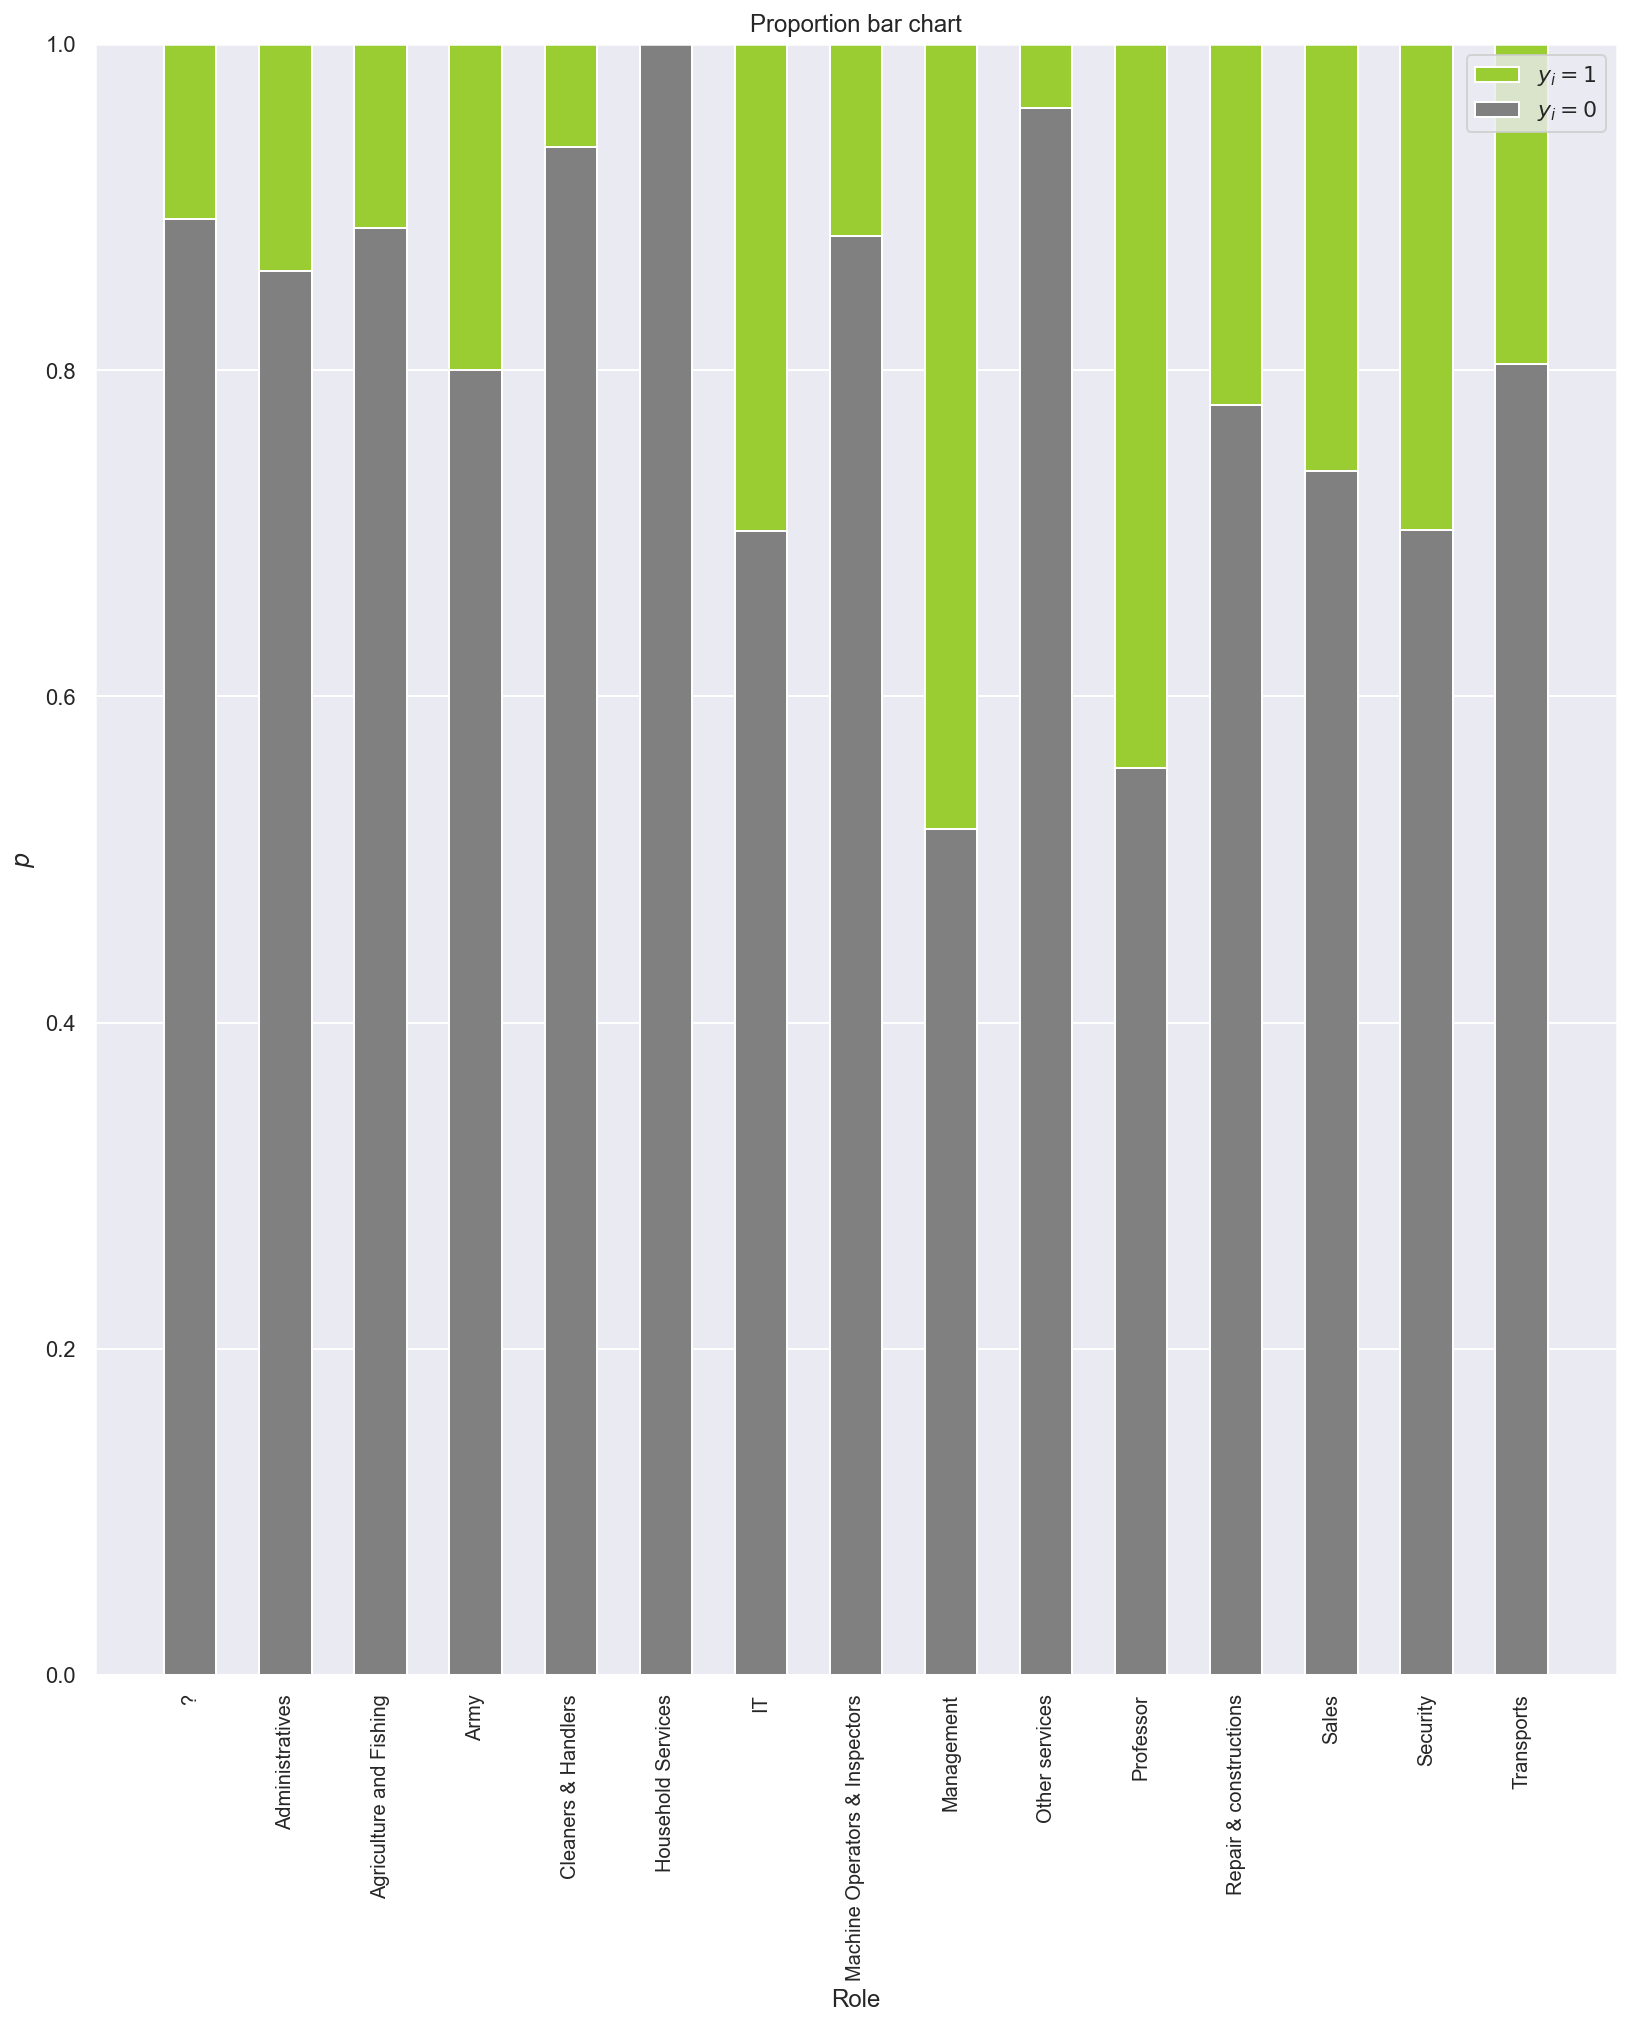

In [142]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)

    plt.show()
    
bar_charts_categorical(newland_train, "Role", "Income")

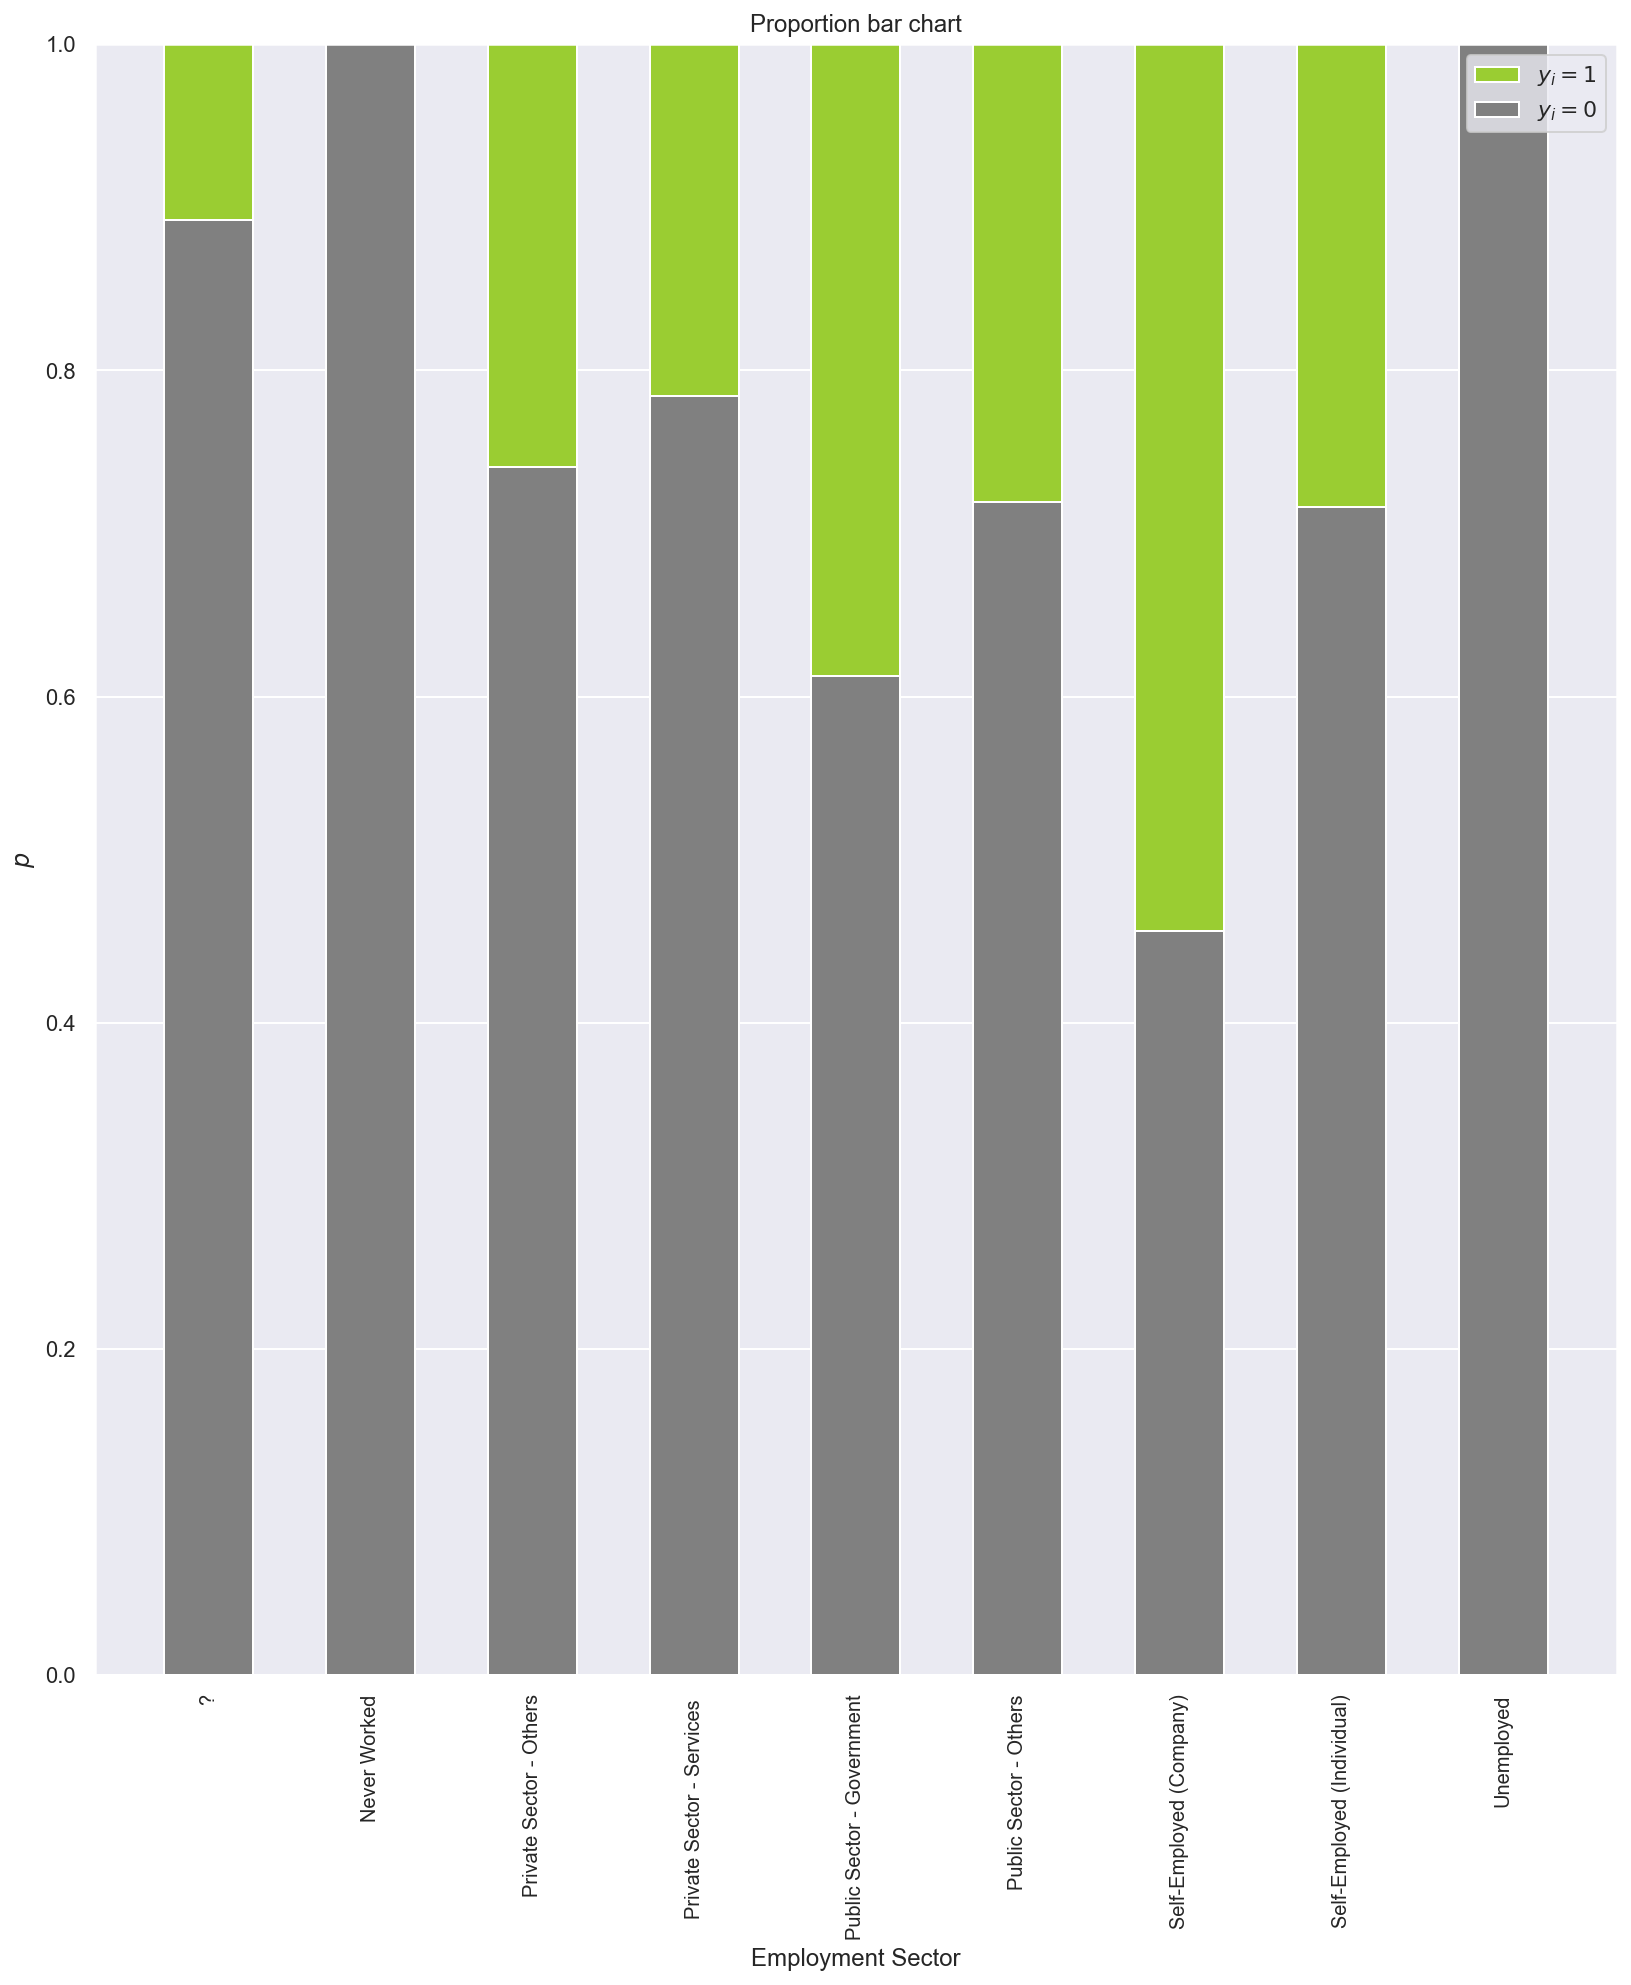

In [143]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Employment Sector", "Income")

In [144]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)
    plt.show()
    
bar_charts_categorical(newland_train, "Base Area", "Income")

KeyboardInterrupt: 

In [ ]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=0)

    plt.show()
    
bar_charts_categorical(newland_train, "Lives with", "Income")

In [ ]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),fontsize="xx-large")
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=90)

    plt.show()
    
bar_charts_categorical(newland_train, "Marital Status", "Income")

In [ ]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=10, rotation=0)

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Income")

In [ ]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 15))
  

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(fontsize=16, rotation=0)

    plt.show()
    
bar_charts_categorical(newland_train, "Native Continent", "Employment Sector")

In [ ]:
#all the categorical variables 
newland_train

In [ ]:
metric_features = newland_train[['Years of Education', 'Working Hours per week', 'Age', 'Income']]
non_metric_features = newland_train.drop(metric_features,axis=1)
non_metric_features

In [ ]:
#We are going to encode education level

from sklearn.preprocessing import OrdinalEncoder
#enc1 = OrdinalEncoder(categories={0:"Preschool",1:"Primary School",2:"Middle School - 1st Cycle";3:"Middle School - 2nd Cycle",4:"Middle School Complete", 5:"High School - 1st Cycle", 6:"High School - 2nd Cycle",7:"High School Complete", 8:"High School + PostGraduation", 9: "Professional School", 10:"Professional School + PostGraduation",11:"Bachelors",12:"Bachelors + PostGraduation",13:"Masters",14:"Masters + PostGraduation",15:"Phd"})
#enc = OrdinalEncoder()
#x=[["Preschool",0], ["Primary School",1],["Mi[ddle School - 1st Cycle",2],["Middle School - 2nd Cycle",3],["Middle School Complete",4],["High School - 1st Cycle",5],["High School - 2nd Cycle",6],["High School Complete",7],["High School + PostGraduation",8],["Professional School",9],["Professional School + PostGraduation",10],["Bachelors",11],["Bachelors + PostGraduation",12],["Masters",13],["Masters + PostGraduation",14],["Phd",15]]
#enc1.fit(x)
EduLvlDict = {"Preschool":0,"Primary School":1,"Middle School - 1st Cycle":2,"Middle School - 2nd Cycle":3,"Middle School Complete":4,
              "High School - 1st Cycle":5,"High School - 2nd Cycle":6,"High School Complete":7,"High School + PostGraduation":8,"Professional School":9,
              "Professional School + PostGraduation":10,"Bachelors":11,"Bachelors + PostGraduation":12,"Masters":13,"Masters + PostGraduation":14,"PhD":15}

 

non_metric_features.replace({"Education Level": EduLvlDict}, inplace = True)


In [ ]:
non_metric_features["Education Level"]

In [ ]:
education_encoded = pd.Series(EduLvlDict.transform(non_metric_features["Education Level"]))
education_encoded

In [ ]:
education_encoded[["Education Level"]]

In [ ]:
education_encoded.iloc[12490]

In [ ]:
from itertools import product
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(
newland_train,
title='Newland_Profiling',
correlations={
"pearson": {"calculate": True},
"spearman": {"calculate": False},
"kendall": {"calculate": False},
"phi_k": {"calculate": False},
"cramers": {"calculate": False},
},
)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
#from sklearn import preprocessing
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Age Histogram
plt.hist(newland_train["Age"], bins=10)  # mess around with the bins
plt.title("Age", y=-0.2)

plt.show()

In [ ]:
# Income Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Income"], bins=10)  # mess around with the bins
plt.title("Income", y=-0.2)

plt.show()

In [ ]:
# Working hours per Week Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Working Hours per week"], bins=10)  # mess around with the bins
plt.title("Working Hours per week", y=-0.2)

plt.show()

In [ ]:
# Years of Education Histogram (better a scatter plot or pie chart)
plt.hist(newland_train["Years of Education"], bins=10)  # mess around with the bins
plt.title("Years of Education", y=-0.2)

plt.show()

In [ ]:
# Age Variable Box Plot
sns.boxplot(y=newland_train["Age"])

plt.show()

In [ ]:
# Working Hours per week Variable Box Plot
sns.boxplot(y=newland_train["Working Hours per week"])

plt.show()

In [ ]:
# Years of Education Variable Box Plot
sns.boxplot(y=newland_train["Years of Education"])

plt.show()

In [ ]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(newland_train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [ ]:
# Single Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
sns.countplot(x=newland_train["Native Continent"])

plt.show()

In [ ]:
# Marital Status Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Marital Status"], order = newland_train["Marital Status"].value_counts().index)

plt.show()

In [ ]:
# Lives with Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(15,8))
sns.countplot(x=newland_train["Lives with"], order = newland_train["Lives with"].value_counts().index)

plt.show()

In [ ]:
# Base Area Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(20,20))
sns.countplot(x=newland_train["Base Area"],order = newland_train["Base Area"].value_counts().index )
plt.show()

In [ ]:
# Education Level Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Education Level"], order = newland_train["Education Level"].value_counts().index)

plt.show()

In [ ]:
# Employment Sector Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Employment Sector"], order = newland_train["Employment Sector"].value_counts().index)
plt.show()

In [ ]:
# Role Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(30,20))
sns.countplot(x=newland_train["Role"],order = newland_train["Role"].value_counts().index)
plt.show()

In [ ]:
# Group Non-Metric variable bar plot
sns.set() # this resets our formatting defaults
plt.figure(figsize=(10,10))
sns.countplot(x=newland_train["Group"], order = newland_train["Group"].value_counts().index)
plt.show()

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "names", y = "values", ax=ax, data=df)
['Native Continent', 'Marital Status', 'Lives with', 'Base Area', 'Education Level', 'Employment Sector', 'Role', 'Group']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc1 = OrdinalEncoder()


In [ ]:
newland_train[non_metric_features]

In [ ]:
newland_train_enc = pd.DataFrame(enc1.transform(newland_train[non_metric_features]), columns = newland_train[non_metric_features].columns)
newland_train_enc 

In [ ]:
metric_features

In [ ]:
# We will visualize all the categorical attributes using bar charts
#names of all the columns
cols = non_metric_features.columns

#Plot count plot for all attributes in a 2x2 grid
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(20, 6))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=non_metric_features, ax=ax[j], palette="Set2")

In [ ]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots
import numpy

#create a dataframe with only continuous features
data=metric_features.loc[:,['Age','Years of Education','Working Hours per week']] 

#get the names of all the columns
cols=data.columns

#Plot violin for all attributes in a 1x4 grid
n_cols = 3
n_rows = 1

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20, 6))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data, ax=ax[j], palette="Set2")